In this Tutorial we are going to load the summaries of keras with Tensorboard for better visualization. We are goin to train a CNN architecture/model with cifar dataset which is already preloaded in Keras

In [4]:
import tensorflow as tf
from time import time
import matplotlib.pyplot as plt
from tensorflow.python.keras.callbacks import TensorBoard
from tensorflow.python.keras import datasets
keras = tf.keras

Collecting all necessary tools to construct a CNN layer with the help of Keras in Tensorflow

In [5]:
sequential = keras.Sequential
dense = keras.layers.Dense
dropout = keras.layers.Dropout
cnn = keras.layers.Conv2D
max_pool = keras.layers.MaxPool2D
flat = keras.layers.Flatten
batch_size = 10
epochs = 10
nclasses = 10
model_name = 'keras_model.h5'

As the dataset is very large and due to lack of computation power (from next time we will see better results as we are going to train on a GPU) we are now only taking first 1000 examples in training set and 100 in test set

We are preprocessing it with dividing with 255 as the input pixels maximum size is 255 and to get the values in the range of 0 to 1 we are fividing with 255 (max value of pixel)

In [6]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()
print(x_train.shape,y_train.shape)
x_train,y_train = x_train[:1000],y_train[:1000]
x_test,y_test = x_test[:100],y_test[:100]
x_train = x_train/255
x_test = x_test/255
#converting to categorical outputs
y_train = keras.utils.to_categorical(y_train,num_classes=nclasses)
y_test = keras.utils.to_categorical(y_test,num_classes=nclasses)


(50000, 32, 32, 3) (50000, 1)


Creating a CNN layer of Three layer followed by a Flattening and softmax to predict the outcomes of the each image given out of the 10 categories available to us. One layer is Conv2d+conv2d+maxpool+dropout

In [7]:
#creating the model of cnn
model = sequential()
model.add(cnn(32,(3,3),padding='same',activation='relu',input_shape=x_train.shape[1:]))
model.add(cnn(32,(3,3),activation='relu'))
model.add(max_pool(pool_size=(2,2)))
model.add(dropout(0.2))

model.add(cnn(64,(3,3),padding='same',activation='relu'))
model.add(cnn(64,(3,3),activation='relu'))
model.add(max_pool(pool_size=(2,2)))
model.add(dropout(0.4))

model.add(cnn(64,(3,3),padding='same',activation='relu'))
model.add(cnn(64,(3,3),activation='relu'))
model.add(max_pool(pool_size=(2,2)))
model.add(dropout(0.5))

model.add(flat())
model.add(dense(512,activation='relu'))
model.add(dropout(0.5))
model.add(dense(nclasses,activation='softmax'))


Compiling the model to build the layers we can see the model summary here

In [8]:
#Here loss is the difference between the y-y(i) (predicted to actual values)
#optimizer is the one which is way it need to be optimize the loss ex: Gradientdescentoptimizer,rms,adam
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

Getting the Tensoboard ready for saving the summaries and creating the directory with name logs in the parent folder 

In [9]:
tensorboard = TensorBoard(log_dir="logs/",histogram_freq=0,write_graph=True,write_images=True)

To run the tensorboard we need to run

tensorboard --logdir==training:path_to_directory --host=127.0.0.1

for example:
tensorboard --logdir==training:C:\Users\jatoth.kumar\PycharmProjects\robot_project_hyd\logs --host=127.0.0.1

We are going to train the model with train_x and train_y and going to validate on test_x and text_y datasets. Here we need to do the callbacks to tensorboard for visualisation

In [10]:
his = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test,y_test),shuffle=True,callbacks=[tensorboard])
model.save(model_name)

Train on 1000 samples, validate on 100 samples
Epoch 1/10
1000/1000 [==============================] - 8s 8ms/step - loss: 2.3091 - acc: 0.0930 - val_loss: 2.2974 - val_acc: 0.2000
Epoch 2/10
1000/1000 [==============================] - 7s 7ms/step - loss: 2.2664 - acc: 0.1260 - val_loss: 2.1847 - val_acc: 0.2400
Epoch 3/10
1000/1000 [==============================] - 7s 7ms/step - loss: 2.1645 - acc: 0.1830 - val_loss: 2.0448 - val_acc: 0.2100
Epoch 4/10
1000/1000 [==============================] - 7s 7ms/step - loss: 2.0751 - acc: 0.2140 - val_loss: 1.9817 - val_acc: 0.3000
Epoch 5/10
1000/1000 [==============================] - 7s 7ms/step - loss: 2.0207 - acc: 0.2530 - val_loss: 2.0023 - val_acc: 0.2600
Epoch 6/10
1000/1000 [==============================] - 7s 7ms/step - loss: 1.9689 - acc: 0.2540 - val_loss: 1.8677 - val_acc: 0.3300
Epoch 7/10
1000/1000 [==============================] - 7s 7ms/step - loss: 1.9026 - acc: 0.2830 - val_loss: 1.8145 - val_acc: 0.3800
Epoch 8/10
1000

With much less data we have achieved the accuracy to be 0.35 which is a great acheivement. Now we are going to calculate the scores on x_test and y_test

100/100 [==============================] - 0s 2ms/step
1.840434603691101 0.35


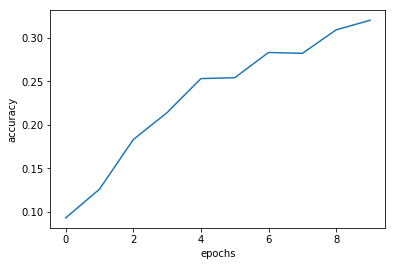

In [11]:
scores = model.evaluate(x_test,y_test,verbose=1)
print(scores[0],scores[1])
plt.plot(his.history['acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

The graph which we plot with the matplotlib and the Tensorboard should be the same. After running the above command in the Terminal (Tensorboard command) just open any browser and go to 127.0.0.1:6006. This will show all the log visualizations which will give a better understanding about the model you have built